In [1]:
import itertools # outputs of CNN 
import matplotlib.pyplot as plt # viz 

import cv2 # import opencv - open images with python
import numpy as np # numpy - expand_dims 

import tensorflow as tf # Main dl architecture
from tensorflow.keras.models import load_model, Sequential # Modelling

In [2]:
# Load up the existing trained model 
model = load_model('./models/multipleTeamClassifier.h5')

In [3]:
# View the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 48)      1344      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 48)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 48)      20784     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 48)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        13856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)      

In [56]:
# This represents the TRAINED intermediate layers
intermediate_layers =  model.layers[:3]

In [57]:
# The intermediate model with TRAINED existing layers
intermediate_model = Sequential(intermediate_layers)

In [58]:
# The intermediate model is now represented as just the X layers that we took
intermediate_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 48)      1344      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 48)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 48)      20784     
                                                                 
Total params: 22,128
Trainable params: 22,128
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Determine required input shape
intermediate_model.input_shape

(None, 256, 256, 3)

In [60]:
# Load the image 
image = cv2.imread('images/tottenhamtest.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

resize = cv2.resize(image, (256,256))

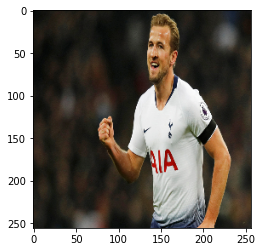

In [61]:
# Viz the resized Image
plt.imshow(resize)

In [62]:
# View the shape of the resized image
resize.shape

(256, 256, 3)

In [63]:
# Make a prediction 
yhat = intermediate_model.predict(np.expand_dims(resize,0))

1/1 [==============================] - 0s 60ms/step


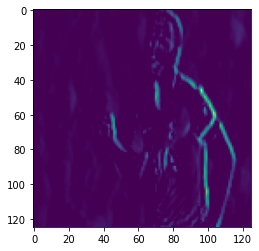

In [64]:
plt.imshow(yhat[0,:,:,7])

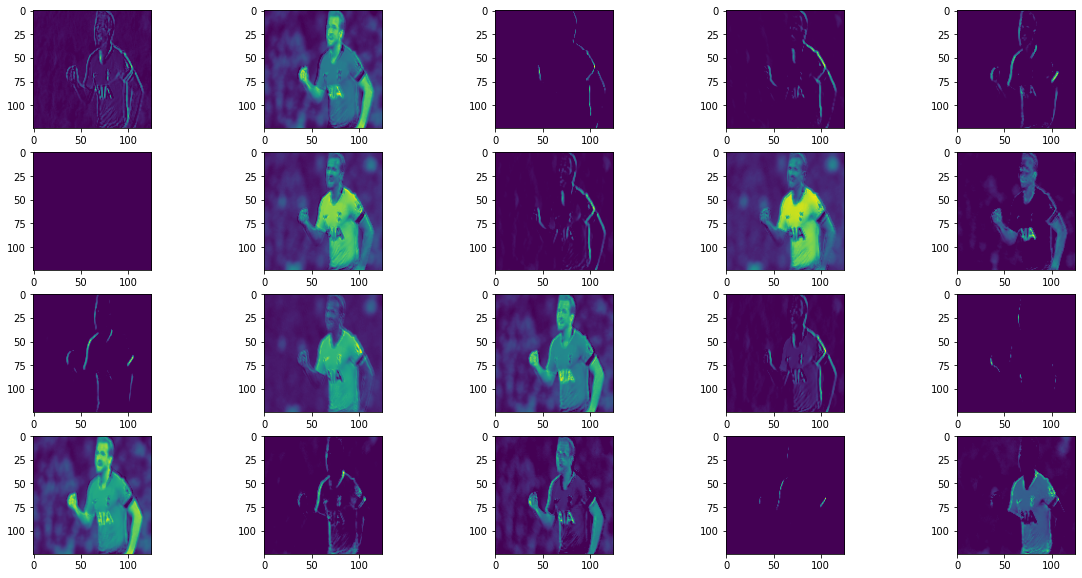

In [65]:
# Viz Grid
num_rows = 4
num_cols = 5 

fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(20,10))
for idx, ax_idx in enumerate(list(itertools.product(range(num_rows), range(num_cols)))):
    ax[ax_idx[0], ax_idx[1]].imshow(yhat[0,:,:,idx])